# Global Solution - DATA SCIENCE e STATISTICAL COMPUTING

## <center>**ANÁLISE DE PEGADA DE CARBONO**</center>

Este projeto de Data Science teve como objetivo analisar e comparar as pegadas de carbono e ecológica de diferentes países e grupos, como Brasil, América, Global, OCDE e EUA. O processo envolveu a seleção de dados relevantes sobre pegadas ecológicas e de carbono de um conjunto global, seguido pela categorização dos países em grupos com base em sua localização geográfica e características econômicas. A partir disso, foram calculadas as médias dessas pegadas para cada grupo, e os resultados foram apresentados por meio de um gráfico de barras comparativo. O projeto oferece insights sobre o impacto ambiental de diferentes regiões e economias, facilitando a compreensão dos padrões globais de consumo e emissões, além de fornecer uma base para discutir políticas de sustentabilidade e mitigação de impactos ecológicos.


---

### **Integrantes do grupo:**
##### Guilherme Doretto Sobreiro  RM:99674
##### Guilherme Fazito Ziolli     RM:550539
##### Raí Gumieri dos Santos      RM:98287

---

## Importações

In [1]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 2.7 MB/s eta 0:00:00


In [12]:
import hvplot.pandas
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Variáveis dos arquivos

In [24]:
global_df = pd.read_csv('Global_Ecological_Footprint_2023.csv', encoding='latin-1')
co2_df = pd.read_csv('owid-co2-data.csv')
product_co2_df = pd.read_csv('production_based_co2_emissions.csv')
annual_co2_df = pd.read_csv('annual-co-emissions-by-region.csv')

## Limpando dados | Arrumando dados

##### Quinto gráfico

In [ ]:
# Renomear a coluna 'Country' para 'country' para consistência
product_co2_df = product_co2_df.rename(columns={'Country': 'country'})
global_df = global_df.rename(columns={'Country': 'country'})

# Combinar datasets baseado no código do país
df_combined = pd.merge(co2_df, product_co2_df, on='country', how='inner')

##### Nono gráfico

In [25]:
# Limpar os dados da coluna 'Per Capita GDP' para remover os caracteres '$' e as vírgulas
global_df['Per Capita GDP'] = global_df['Per Capita GDP'].replace({'\$': '', ',': ''}, regex=True)

# Converter a coluna 'Per Capita GDP' para tipo numérico
global_df['Per Capita GDP'] = pd.to_numeric(global_df['Per Capita GDP'], errors='coerce')

# Filtrar dados relevantes para PIB per capita e pegada ecológica
df_filtered = global_df[['Per Capita GDP', 'Total Ecological Footprint (Consumption)']].dropna()

# Análise de gráficos

## Comparação entre Brasil, América, Global, OCDE e EUA

##### O código realiza uma análise comparativa das pegadas de carbono e ecológica total (em hectares globais per capita) de diferentes grupos e regiões, como Brasil, América, Global, OCDE e EUA. Primeiramente, ele seleciona colunas relevantes do conjunto de dados e classifica os países em grupos específicos com base em sua região ou identificação (como Brasil, EUA e países da OCDE). Em seguida, o código calcula as médias dessas pegadas para cada grupo e gera um gráfico de barras comparativo, permitindo visualizar as diferenças entre os impactos ambientais dos grupos selecionados. O gráfico exibe as pegadas de carbono e ecológicas lado a lado, utilizando cores distintas para cada variável.

<ipython-input-20-aabc4eb68430>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Group'] = 'Global'  # Padrão como "Global"


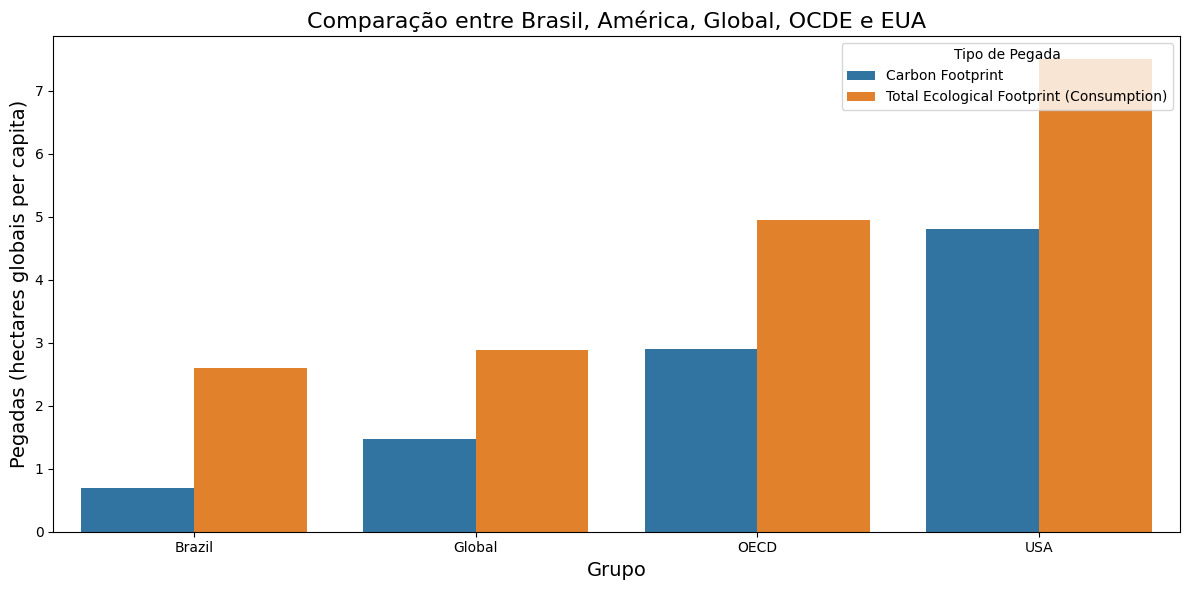

In [20]:
# Selecionar colunas relevantes
data_filtered = global_df[['Country', 'Region', 'Carbon Footprint', 'Total Ecological Footprint (Consumption)', 'Income Group']]

# Adicionar um identificador para os grupos solicitados
data_filtered['Group'] = 'Global'  # Padrão como "Global"

# Adicionar os grupos específicos
data_filtered.loc[data_filtered['Region'] == 'America', 'Group'] = 'America'
data_filtered.loc[data_filtered['Country'] == 'Brazil', 'Group'] = 'Brazil'
data_filtered.loc[data_filtered['Country'] == 'United States of America', 'Group'] = 'USA'

# Assumindo que OCDE é uma lista de países (precisa ser definida)
ocde_countries = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom']  # Exemplo
data_filtered.loc[data_filtered['Country'].isin(ocde_countries), 'Group'] = 'OECD'

# Filtrar apenas os grupos de interesse
comparison_groups = ['Brazil', 'Global', 'America', 'OECD', 'USA']
data_comparison = data_filtered[data_filtered['Group'].isin(comparison_groups)]

# Calcular médias para grupos não específicos de países
group_means = data_comparison.groupby('Group')[['Carbon Footprint', 'Total Ecological Footprint (Consumption)']].mean().reset_index()

# Transformar os dados para o formato longo (necessário para Seaborn)
group_means_melted = group_means.melt(id_vars=['Group'], value_vars=['Carbon Footprint', 'Total Ecological Footprint (Consumption)'],
                                      var_name='Footprint Type', value_name='Value')

# Criar o gráfico de barras comparando os valores para Carbon Footprint e Total Ecological Footprint (Consumption)
plt.figure(figsize=(12, 6))

sns.barplot(x='Group', y='Value', hue='Footprint Type', data=group_means_melted, palette=['#1f77b4', '#ff7f0e'])

# Ajustes de título e rótulos
plt.title('Comparação entre Brasil, América, Global, OCDE e EUA', fontsize=16)
plt.xlabel('Grupo', fontsize=14)
plt.ylabel('Pegadas (hectares globais per capita)', fontsize=14)
plt.legend(title='Tipo de Pegada', loc='upper right')

# Exibir o gráfico
plt.tight_layout()
plt.show()



### **Conclusão**

O gráfico apresenta a comparação entre a Pegada de Carbono (em azul) e a Pegada Ecológica Total (em laranja) per capita para diferentes regiões e países, incluindo Brasil, Global, OECD (Organização para a Cooperação e Desenvolvimento Econômico) e EUA. A análise visual revela:

- **Brasil**: A pegada de carbono é significativamente menor do que a pegada ecológica total. Isso sugere que, embora o Brasil tenha um impacto ecológico moderado, a emissão de carbono per capita é relativamente baixa.
- **Global**: O gráfico mostra que a pegada de carbono e a pegada ecológica total globais são bastante equilibradas, com valores medianos para ambas as variáveis.
- **OECD**: Para a OECD, a pegada de carbono é um pouco mais alta do que a pegada ecológica total, refletindo um impacto ambiental relativamente grande, mas equilibrado, em comparação com outras regiões.
- **EUA**: Os EUA têm uma pegada de carbono per capita muito maior do que a pegada ecológica total. Isso indica um grande impacto ambiental, provavelmente relacionado a padrões de consumo elevado e industrialização, com a emissão de carbono desempenhando um papel significativo.



---



Este gráfico destaca diferenças marcantes nas pegadas de carbono e ecológicas per capita entre os países e regiões. Os EUA se destacam com uma pegada de carbono muito maior, enquanto o Brasil, por outro lado, apresenta um impacto ambiental menor. O gráfico sugere que países mais industrializados (como os EUA e países da OECD) têm maiores emissões de carbono, enquanto o Brasil, apesar de um impacto ecológico relevante, ainda tem uma pegada de carbono mais baixa. Essa informação pode ser útil para a formulação de políticas ambientais focadas em reduzir as emissões de carbono e melhorar a sustentabilidade global.



---



---




## Onde o Brasil pode avançar para reduzir a pegada de carbono

##### O gráfico criado neste código irá mostrar a evolução das emissões de CO₂ no Brasil ao longo dos anos, divididas por diferentes setores. Os setores analisados incluem cimento, carvão, petróleo, gás, queima de gás (flaring) e uso da terra. O processo começa com a seleção dos dados de emissões para o Brasil e a agregação das emissões por ano. Em seguida, os dados são transformados para um formato adequado para visualização, onde as emissões de CO₂ de cada setor são organizadas ao longo do tempo. O gráfico gerado será uma linha para cada setor, mostrando como as emissões de CO₂ variam de ano para ano, permitindo uma análise das tendências e comparações entre os setores no período estudado. O gráfico terá a legenda indicando os setores, e os eixos representarão os anos e as emissões em milhões de toneladas (Mt).

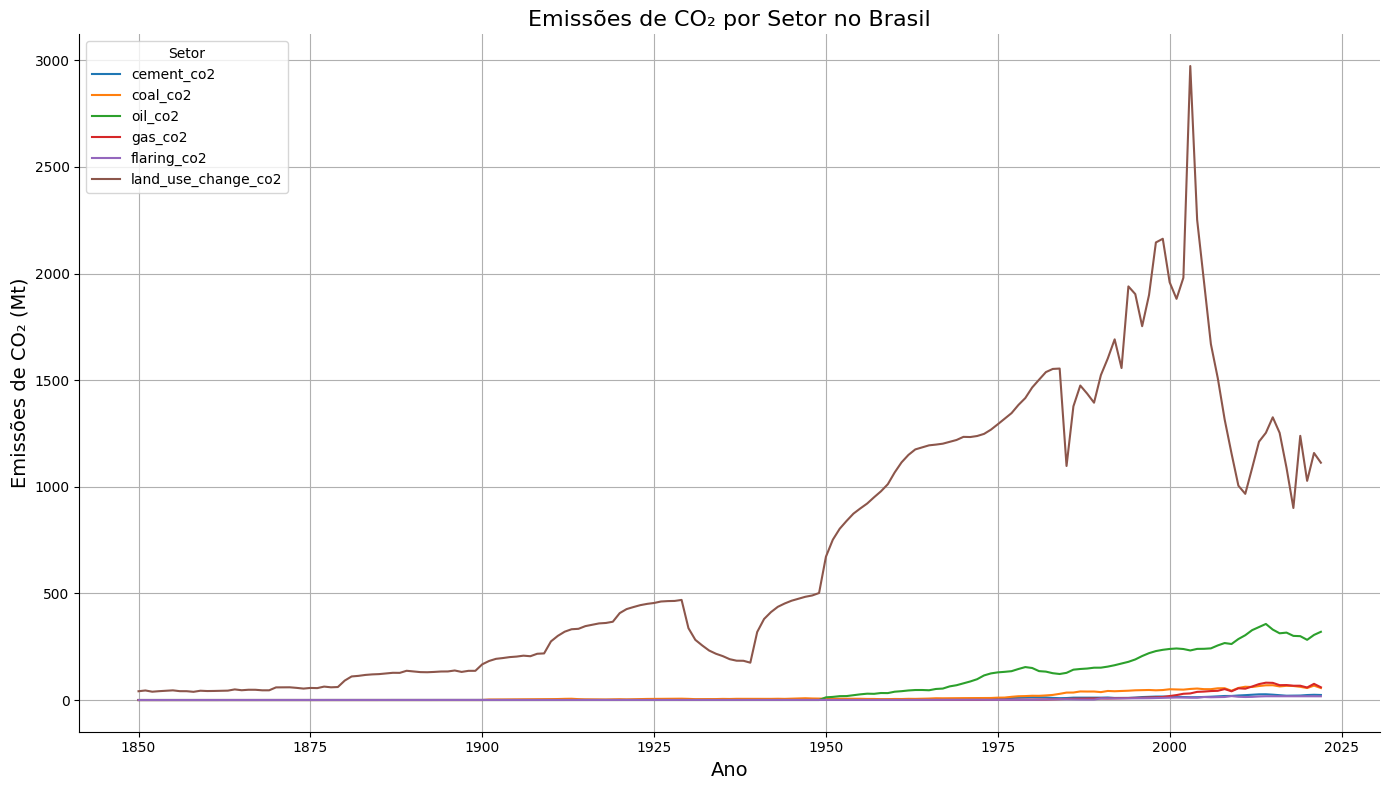

In [ ]:
# Selecionar setores relevantes e filtrar os dados do Brasil
sectors = ['cement_co2', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2', 'land_use_change_co2']
brazil_emissions = co2_df[co2_df['country'] == 'Brazil'][['year'] + sectors].groupby('year').sum().reset_index()

# Transformar os dados para formato longo para visualização
brazil_emissions_melted = brazil_emissions.melt(id_vars=['year'], value_vars=sectors,
                                                var_name='Setor', value_name='Emissões de CO₂ (Mt)')

# Gráfico de barras das emissões por setor ao longo do tempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='Emissões de CO₂ (Mt)', hue='Setor', data=brazil_emissions_melted)
plt.title('Emissões de CO₂ por Setor no Brasil', fontsize=16)
plt.ylabel('Emissões de CO₂ (Mt)', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.legend(title='Setor')
plt.grid(True)
plt.tight_layout()
sns.despine()
plt.show()

### **Conclusão**

#### Principais Áreas de Melhoria

1. **Mudança no Uso da Terra**:
   - **Maior Contribuição às Emissões**: Este setor tem sido historicamente o maior contribuinte para as emissões de CO₂, especialmente entre 1950 e 2005, com um pico significativo em 2005.
   - **Ações Sugeridas**: Reduzir o desmatamento, promover a restauração florestal e implementar práticas de uso sustentável da terra podem ter um impacto significativo na redução das emissões de CO₂.

2. **Setor de Petróleo**:
   - **Crescimento Constante**: As emissões de CO₂ do setor de petróleo têm aumentado constantemente desde 1950.
   - **Ações Sugeridas**: Investir em fontes de energia renovável, como energia solar e eólica, e reduzir a dependência de combustíveis fósseis, pode ajudar a diminuir as emissões provenientes deste setor.

3. **Setores de Carvão e Gás**:
   - **Emissões Significativas**: Embora as emissões desses setores sejam menores em comparação com a mudança no uso da terra e o petróleo, eles ainda representam uma parte significativa das emissões totais.
   - **Ações Sugeridas**: A transição para fontes de energia mais limpas e eficientes, e a adoção de tecnologias de captura e armazenamento de carbono, podem contribuir para a redução das emissões nesses setores.

4. **Setores de Cimento e Queima de Gás**:
   - **Melhorias na Eficiência Energética**: Estes setores têm emissões relativamente baixas, mas melhorias na eficiência energética e o uso de tecnologias mais limpas podem ajudar a reduzir ainda mais as emissões.
   - **Ações Sugeridas**: Implementar práticas de produção de cimento mais sustentáveis e tecnologias avançadas de queima de gás pode reduzir as emissões de CO₂.



---

Para reduzir significativamente sua pegada de carbono, o Brasil pode focar em:
- Reduzir o desmatamento e promover a restauração florestal.
- Investir em energias renováveis e reduzir a dependência de combustíveis fósseis.
- Melhorar a eficiência energética e adotar tecnologias limpas nos setores de carvão, gás, cimento e queima de gás.

Essas ações combinadas podem ajudar o Brasil a avançar em direção a um futuro mais sustentável e com menores emissões de carbono.



---



---




## Diferenças regionais na pegada ecológica e na pegada de carbono entre continentes ou hemisférios

##### Este código analisa e compara o impacto ambiental de diferentes continentes por meio de dois gráficos de barras: um que mostra a média da Pegada Ecológica (uso de recursos naturais) e outro que exibe a média da Pegada de Carbono (emissões de gases de efeito estufa). Além disso, ele calcula estatísticas descritivas, como média, mínimo e máximo, para cada continente. A análise ajuda a identificar quais continentes têm maior impacto ambiental, tanto no uso de recursos quanto nas emissões, permitindo visualizar as diferenças regionais e compreender a variação desses impactos.

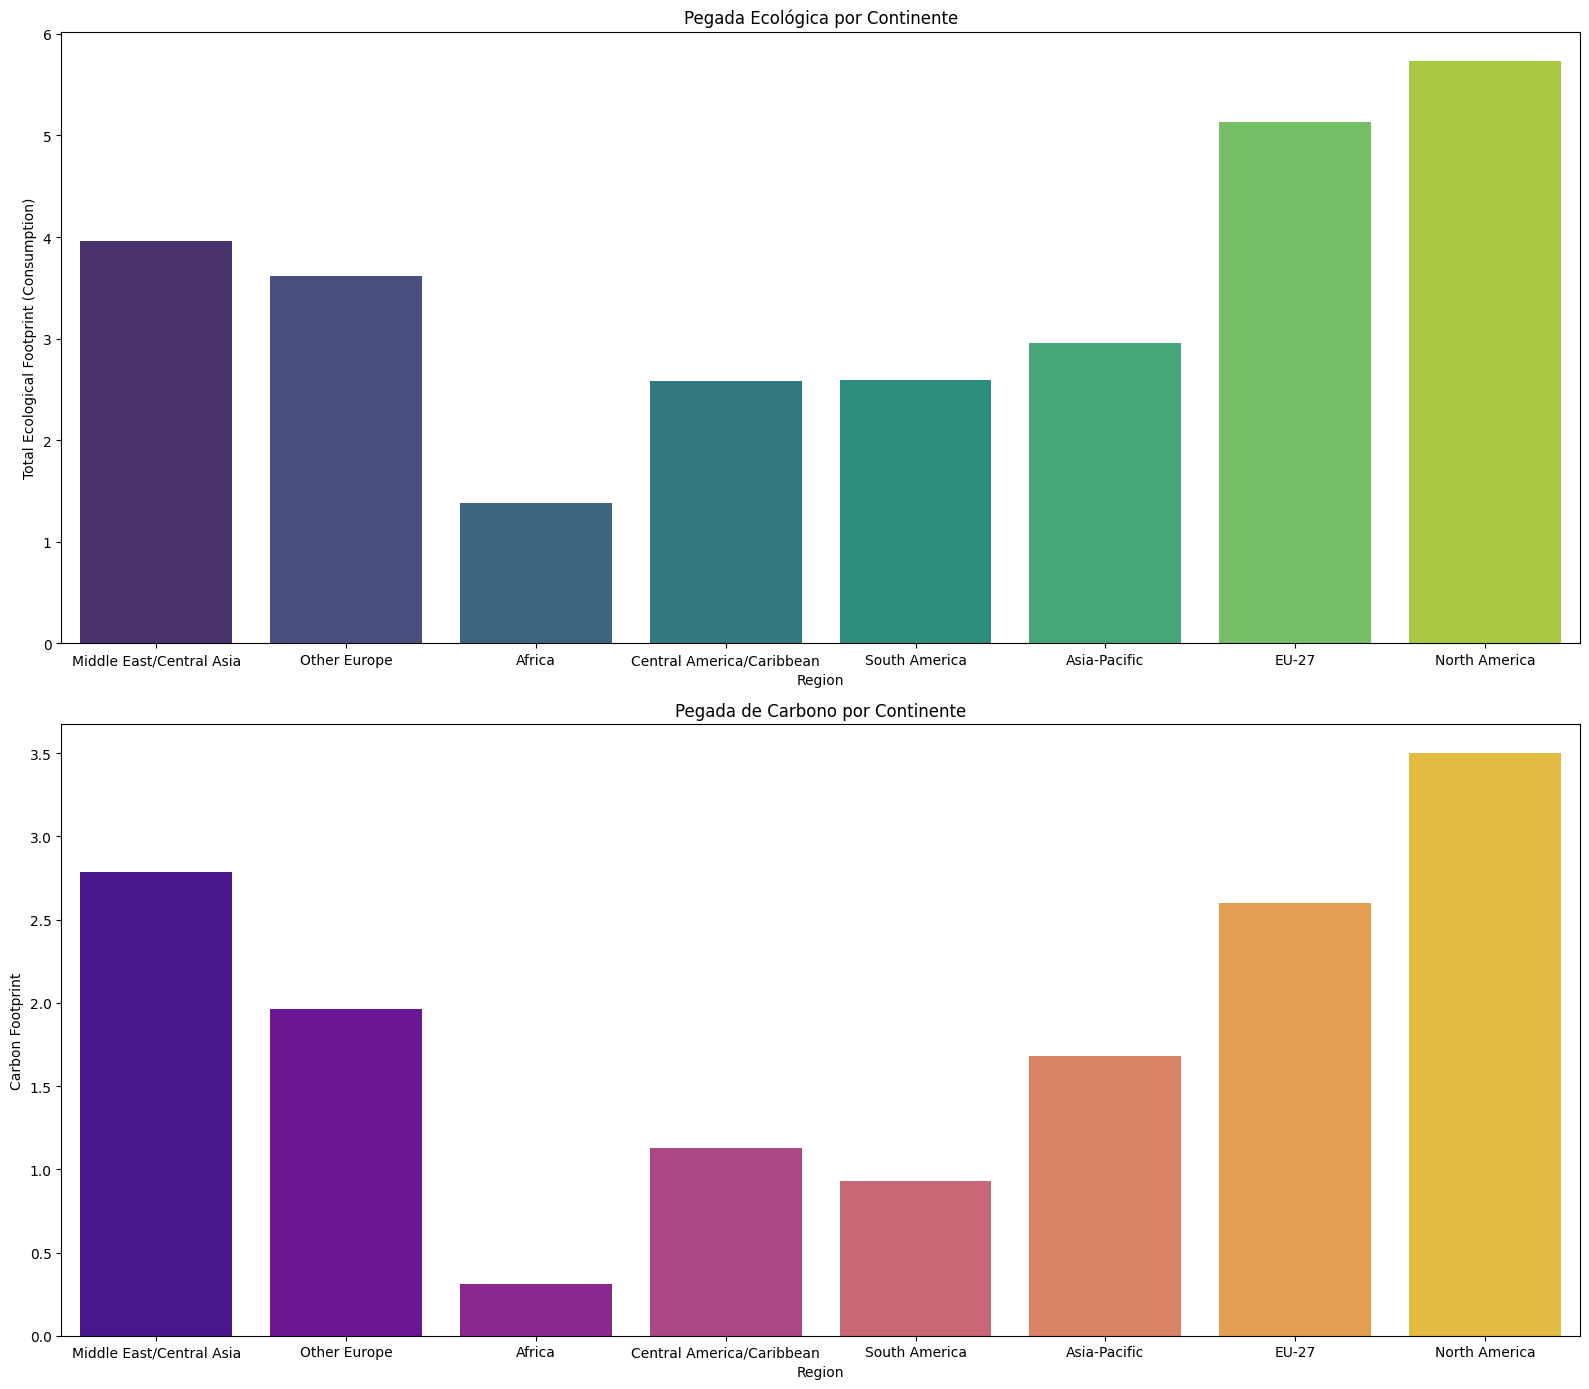

                          Total Ecological Footprint (Consumption)            \
                                                             count      mean   
Region                                                                         
Africa                                                        53.0  1.384906   
Asia-Pacific                                                  30.0  2.953333   
Central America/Caribbean                                     20.0  2.580000   
EU-27                                                         26.0  5.134615   
Middle East/Central Asia                                      23.0  3.965217   
North America                                                  3.0  5.733333   
Other Europe                                                  13.0  3.615385   
South America                                                 13.0  2.592308   

                                                                   \
                                std  min    25%   

In [ ]:
# Criar subplots para os dois gráficos
fig, axes = plt.subplots(2, 1, figsize=(16, 14))  # Dois gráficos empilhados

# Primeiro gráfico: Pegada Ecológica por Continente
sns.barplot(
    x='Region',
    y='Total Ecological Footprint (Consumption)',
    data=global_df,
    hue='Region',  # Usar a variável categórica para definir as cores
    palette='viridis',
    errorbar=None,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Pegada Ecológica por Continente')

# Segundo gráfico: Pegada de Carbono por Continente
sns.barplot(
    x='Region',
    y='Carbon Footprint',
    data=global_df,
    hue='Region',  # Usar a variável categórica para definir as cores
    palette='plasma',
    errorbar=None,
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Pegada de Carbono por Continente')

# Ajustar o espaçamento entre os gráficos
plt.tight_layout()
plt.show()

# Adicionando estatísticas descritivas
continent_stats = global_df.groupby('Region')[['Total Ecological Footprint (Consumption)', 'Carbon Footprint']].describe()
print(continent_stats)


### **Conclusão**

## Pegada Ecológica e Pegada de Carbono por Continente

A imagem contém dois gráficos de barras que comparam a pegada ecológica e a pegada de carbono por continente. A seguir estão as observações principais para cada gráfico:

### Pegada Ecológica por Continente

O gráfico superior intitulado "Pegada Ecológica por Continente" mostra a pegada ecológica total (consumo) para várias regiões. As regiões e seus valores aproximados são:
- **Oriente Médio/Ásia Central**: 4.0
- **Outros países da Europa**: 3.8
- **África**: 1.5
- **Região da América Central/Caribe**: 2.5
- **América do Sul**: 2.3
- **Ásia-Pacífico**: 3.0
- **UE-27**: 4.5
- **América do Norte**: 5.5

### Pegada de Carbono por Continente

O gráfico inferior intitulado "Pegada de Carbono por Continente" mostra a pegada de carbono para as mesmas regiões. As regiões e seus valores aproximados são:
- **Oriente Médio/Ásia Central**: 2.8
- **Outros países da Europa**: 2.0
- **África**: 0.8
- **Região da América Central/Caribe**: 1.2
- **América do Sul**: 1.0
- **Ásia-Pacífico**: 2.5
- **UE-27**: 3.0
- **América do Norte**: 3.5



---



Os gráficos destacam diferenças regionais na pegada ecológica e na pegada de carbono. A América do Norte apresenta as maiores pegadas ecológica e de carbono, indicando um alto consumo de recursos naturais e emissões. A África, por outro lado, tem as menores pegadas, refletindo um consumo e emissões significativamente mais baixos. Essas informações são cruciais para entender o impacto ambiental global e formular políticas para reduzir a pegada ecológica e de carbono.

---

Esta análise fornece uma visão clara das pegadas ecológica e de carbono por continente, ajudando a identificar áreas de alto impacto ambiental e possíveis intervenções.



---



---




## Existe uma correlação entre a pegada ecológica per capita e o PIB per capita nos diferentes países?

##### O código analisa a relação entre o PIB per capita e a pegada ecológica de diferentes países. Primeiro, ele seleciona dados relevantes, como o nome do país, a região geográfica, o PIB per capita e a pegada ecológica. Em seguida, limpa os dados, removendo entradas faltantes e ajustando o PIB para garantir que esteja no formato numérico correto. Por fim, o código gera um gráfico de dispersão, onde é possível visualizar como o PIB e a pegada ecológica se relacionam, destacando as diferenças entre as regiões. Esse gráfico ajuda a entender se países mais ricos tendem a consumir mais recursos naturais.

<ipython-input-33-460b3204e89d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Per Capita GDP'] = (


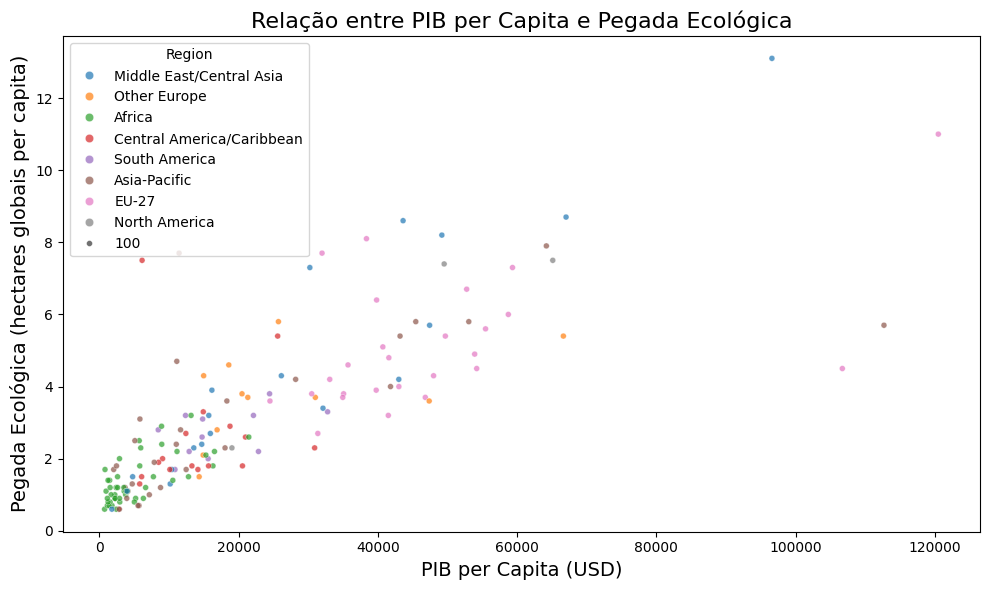

In [33]:
# Selecionar colunas relevantes
data_filtered = global_df[['Country', 'Region', 'Per Capita GDP', 'Total Ecological Footprint (Consumption)']]

# Limpar valores não numéricos e converter para float
data_filtered['Per Capita GDP'] = (
    data_filtered['Per Capita GDP']
    .astype(str)  # Converte para string
    .str.strip()  # Remove espaços em branco
    .replace('[\$,]', '', regex=True)  # Remove símbolos como "$" ou ","
    .replace('', 'NaN')  # Substitui strings vazias por NaN
    .pipe(pd.to_numeric, errors='coerce')  # Converte para numérico, ignorando erros
)

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Per Capita GDP', y='Total Ecological Footprint (Consumption)', hue='Region', data=data_filtered,
                size=100, alpha=0.7, legend='full', palette='tab10')

# Ajustar título e rótulos
plt.title('Relação entre PIB per Capita e Pegada Ecológica', fontsize=16)
plt.xlabel('PIB per Capita (USD)', fontsize=14)
plt.ylabel('Pegada Ecológica (hectares globais per capita)', fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### **Conclusão**

## Relação entre PIB per Capita e Pegada Ecológica

O gráfico de dispersão intitulado "Relação entre PIB per Capita e Pegada Ecológica" ilustra a relação entre o PIB per Capita (em USD) e a Pegada Ecológica (em hectares globais per capita). A seguir estão as observações principais:

### Principais Observações:

- **Eixo X**: Representa o PIB per Capita (USD).
- **Eixo Y**: Representa a Pegada Ecológica (hectares globais per capita).
- **Cores dos Pontos**: Representam diferentes regiões:
  - **Oriente Médio/Ásia Central (azul)**
  - **Outros países da Europa (laranja)**
  - **África (verde)**
  - **Região da América Central/Caribe (vermelho)**
  - **América do Sul (roxo)**
  - **Ásia-Pacífico (ciano)**
  - **UE-27 (cinza)**
  - **América do Norte (rosa)**

### Tendências e Análise:

- **Correlação Positiva**: O gráfico mostra uma correlação positiva entre o PIB per Capita e a Pegada Ecológica. Isso indica que, em geral, países com maior PIB per Capita tendem a ter uma maior Pegada Ecológica.
- **Distribuição Regional**:
  - **América do Norte e Europa**: Apresentam os maiores PIBs per capita e Pegadas Ecológicas, sugerindo alto consumo de recursos.
  - **África e América Central/Caribe**: Têm os menores PIBs per capita e Pegadas Ecológicas, refletindo um consumo de recursos mais baixo.
  - **Oriente Médio/Ásia Central e Ásia-Pacífico**: Mostram uma ampla variação, com alguns países apresentando PIBs per capita altos e Pegadas Ecológicas significativas.
  - **América do Sul**: Apresenta uma distribuição intermediária, com variações moderadas em ambos os eixos.



---



O gráfico destaca a relação entre a prosperidade econômica (PIB per Capita) e o impacto ambiental (Pegada Ecológica). Países mais ricos tendem a ter um impacto ambiental maior, refletindo maior consumo de recursos naturais. Essa análise é crucial para entender como o desenvolvimento econômico influencia o meio ambiente e para formular políticas de sustentabilidade.

---

Esta análise fornece uma visão detalhada da relação entre o PIB per Capita e a Pegada Ecológica, ajudando a entender as dinâmicas regionais e a necessidade de políticas ambientais eficazes.




---



---



## Países com maior déficit ecológico e impacto nas emissões de carbono

##### O código compara a emissão de CO2 per capita por continente nos anos de 2000 e 2018. Ele seleciona e organiza os dados para esses dois anos, criando gráficos de caixa para visualizar a distribuição das emissões por continente em cada período. Além disso, calcula e exibe estatísticas descritivas para cada continente, como média e desvio padrão, permitindo observar as mudanças nas emissões de CO2 ao longo do tempo. Em resumo, o código analisa a evolução das emissões de CO2 per capita entre 2000 e 2018.

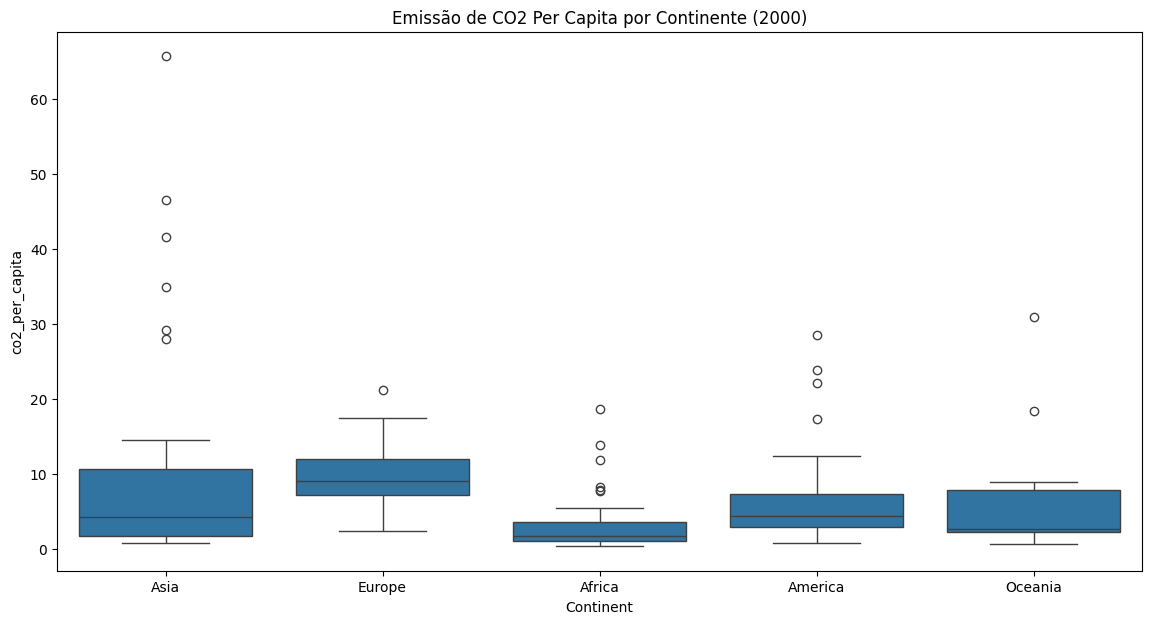

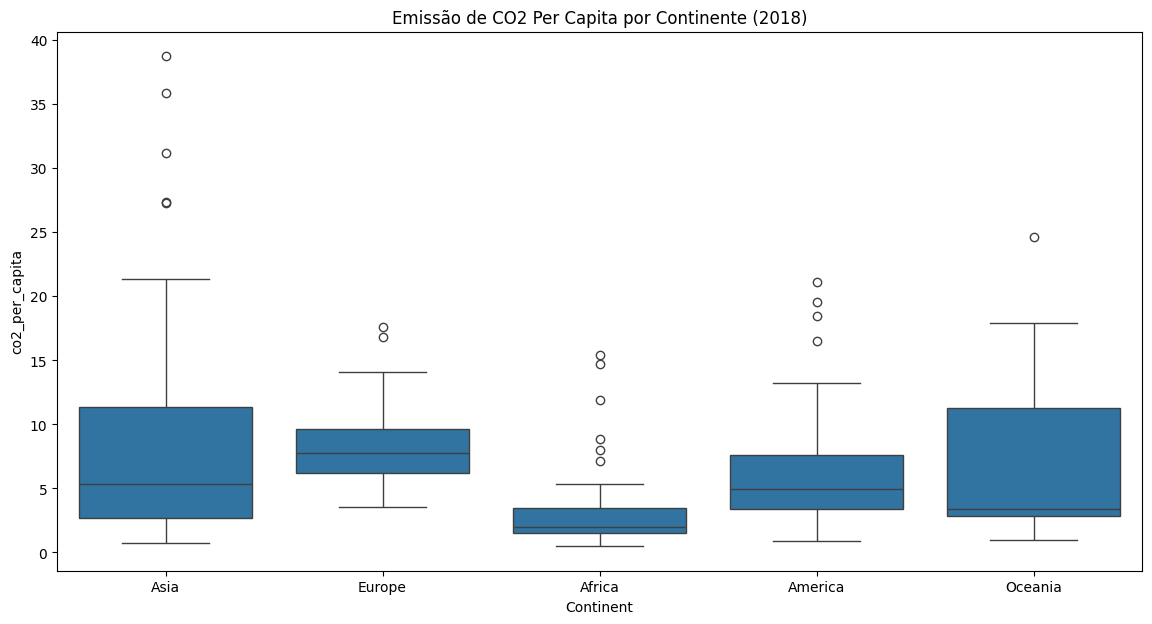

           count      mean        std   min    25%   50%      75%    max
Continent                                                               
Africa      51.0  3.077647   3.590618  0.35  1.060  1.72   3.5550  18.66
America     35.0  6.833714   6.600512  0.76  2.950  4.40   7.2850  28.55
Asia        46.0  9.698478  13.652943  0.81  1.660  4.29  10.6700  65.64
Europe      36.0  9.468056   3.947751  2.36  7.125  9.00  12.0375  21.14
Oceania     11.0  7.163636   9.387919  0.59  2.295  2.62   7.8000  30.84
           count      mean       std   min    25%    50%      75%    max
Continent                                                               
Africa      50.0  3.220600  3.335196  0.49  1.490  1.960   3.4750  15.43
America     35.0  6.780286  5.247196  0.89  3.400  4.930   7.5850  21.14
Asia        46.0  9.294130  9.621311  0.76  2.680  5.315  11.3975  38.75
Europe      38.0  8.260789  3.171911  3.52  6.170  7.745   9.6700  17.60
Oceania     11.0  7.571818  8.137399  0.95  2.815  

In [ ]:
# Filtrar dados para o ano de 2000 e 2018
df_prod_2000 = product_co2_df[['Continent', 'Metric tons of CO2e per capita (2000)']]
df_prod_2000 = df_prod_2000.rename(columns={'Metric tons of CO2e per capita (2000)': 'co2_per_capita'})

df_prod_2018 = product_co2_df[['Continent', 'Metric tons of CO2e per capita (2018)']]
df_prod_2018 = df_prod_2018.rename(columns={'Metric tons of CO2e per capita (2018)': 'co2_per_capita'})

# Gráficos de emissão per capita por continente
plt.figure(figsize=(14,7))
sns.boxplot(x='Continent', y='co2_per_capita', data=df_prod_2000)
plt.title('Emissão de CO2 Per Capita por Continente (2000)')
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(x='Continent', y='co2_per_capita', data=df_prod_2018)
plt.title('Emissão de CO2 Per Capita por Continente (2018)')
plt.show()

# Estatísticas descritivas
continent_stats_2000 = df_prod_2000.groupby('Continent')['co2_per_capita'].describe()
continent_stats_2018 = df_prod_2018.groupby('Continent')['co2_per_capita'].describe()
print(continent_stats_2000)
print(continent_stats_2018)

### **Conclusão**

## Análise das Emissões de CO2 per Capita por Continente em 2000 e 2018

### 2000

Em 2000, a emissão de CO2 per capita apresentou as seguintes características por continente:

- **Europa**: Maior mediana de emissões, indicando níveis mais altos de emissão per capita.
- **Ásia**: Mediana alta com grande variação, mostrando diferenças significativas entre países.
- **Oceania**: Mediana relativamente alta, com menos dispersão.
- **América**: Emissões intermediárias, com alguns outliers indicando emissões muito altas.
- **África**: Menor mediana de emissão, com emissões relativamente baixas.

### 2018

Em 2018, a análise das emissões per capita foi:

- **Ásia**: Aumento significativo na variação das emissões, com muitos outliers de emissões extremamente altas.
- **Europa**: Distribuição similar a 2000, com um leve aumento na dispersão dos dados.
- **Oceania**: Distribuição estável, com um outlier significativo.
- **América**: Distribuição semelhante a 2000, com alguns outliers altos.
- **África**: Menor mediana de emissões, com alguns outliers indicando emissões mais elevadas em certas nações.



---



##### Os gráficos destacam diferenças regionais nas emissões de CO2 ao longo do tempo, indicando áreas de maior e menor impacto ambiental. Essas informações são cruciais para a formulação de políticas ambientais adaptadas às especificidades de cada continente.

---

##### Esta análise fornece uma visão geral das emissões de CO2 per capita em diferentes continentes, ajudando a identificar tendências e áreas críticas para intervenções ambientais.



---



---




## Setores que mais contribuem para as emissões de carbono ao longo do tempo

##### O código analisa as emissões de CO2 por setor (cimento, carvão, petróleo e gás) ao longo do tempo. Ele agrupa os dados por ano e país, somando as emissões de cada setor, e cria um gráfico de linha para visualizar como essas emissões mudaram ao longo dos anos. Além disso, o código utiliza uma regressão linear para prever as emissões com base nos setores, calculando os coeficientes e o intercepto do modelo para entender a influência de cada setor nas emissões ao longo do tempo.

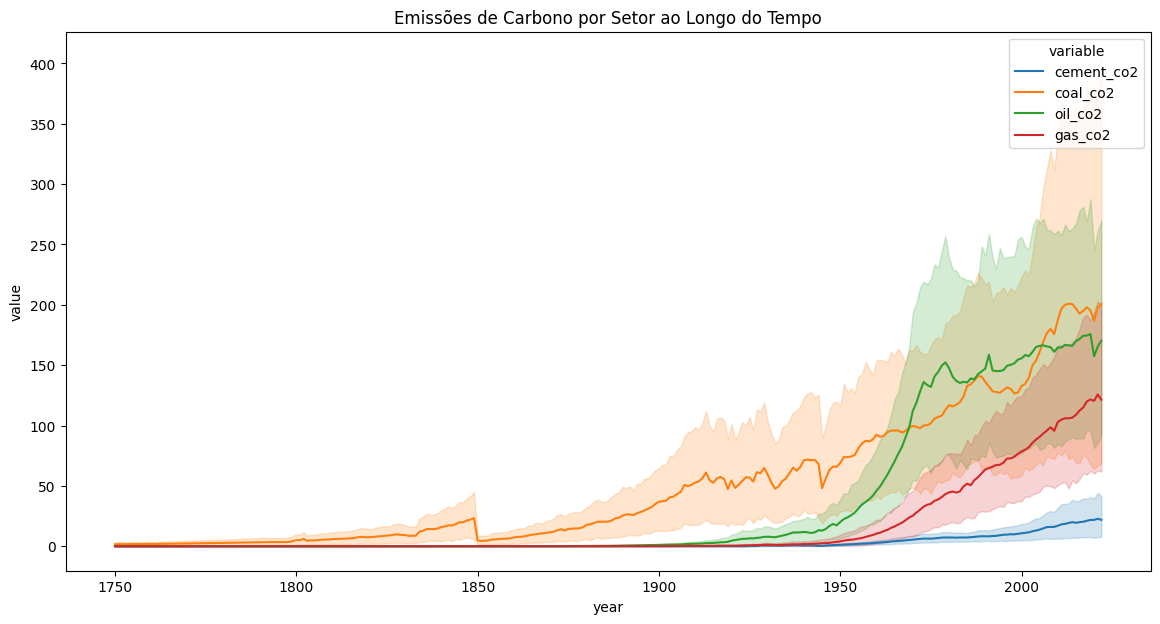

LinearRegression()

In [ ]:
# Filtrar e agrupar dados por setor
df_sector = co2_df[['year', 'country', 'cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']]
df_sector_grouped = df_sector.groupby(['year', 'country']).sum().reset_index()

# Gráfico das emissões por setor ao longo do tempo
plt.figure(figsize=(14,7))
sns.lineplot(x='year', y='value', hue='variable',
             data=pd.melt(df_sector_grouped, ['year', 'country']))
plt.title('Emissões de Carbono por Setor ao Longo do Tempo')
plt.show()

# Regressão linear para prever emissões
X = df_sector_grouped[['cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']]
y = df_sector_grouped['year']
model = LinearRegression()
model.fit(X, y)

### **Conclusão**  

## Análise das Emissões de Carbono por Setor ao Longo do Tempo  

### **Tendências Gerais**  

O gráfico apresenta as emissões de carbono (em milhões de toneladas) ao longo dos anos em diferentes setores industriais, como carvão, petróleo, gás e cimento. Os principais pontos observados foram:  

- **Carvão (`coal_co2`)**: Este setor lidera as emissões ao longo do tempo, com um crescimento constante desde a Revolução Industrial. A dependência global de carvão como fonte de energia é evidente, especialmente durante o século XX.  
- **Petróleo (`oil_co2`)**: As emissões desse setor aumentaram significativamente no início do século XX, refletindo o crescimento do transporte motorizado e a industrialização.  
- **Gás (`gas_co2`)**: Embora inicialmente insignificante, o setor de gás natural ganhou relevância no século XX, devido ao seu uso como alternativa energética.  
- **Cimento (`cement_co2`)**: A contribuição desse setor começou de forma discreta, mas cresceu ao longo das décadas, acompanhando o aumento na construção civil e no uso de concreto.  

### **Mudanças Notáveis ao Longo do Tempo**  

- Durante o período **pós-Segunda Guerra Mundial**, as emissões de todos os setores aumentaram exponencialmente, impulsionadas pelo crescimento industrial e econômico global.  
- O setor de petróleo começou a se destacar nas décadas de 1950 e 1960, enquanto o gás natural e o cimento cresceram mais expressivamente a partir das décadas de 1970 e 1980.  

---  

##### O gráfico evidencia a crescente dependência global de combustíveis fósseis e da indústria pesada, destacando a necessidade de transição para alternativas mais sustentáveis. A análise histórica é crucial para compreender o impacto ambiental acumulado e direcionar políticas climáticas eficazes.  

---  

##### Esta análise fornece uma visão clara do comportamento das emissões de carbono por setor ao longo do tempo, ajudando a identificar os maiores contribuintes e as tendências históricas para apoiar estratégias de mitigação das mudanças climáticas.  

---


## Impacto da mudança no uso da terra nas emissões totais de CO₂ em diferentes regiões

##### O gráfico gerado neste código irá ilustrar o impacto da mudança no uso da terra nas emissões de CO₂ ao longo do tempo, destacando as diferentes regiões do mundo. O processo começa com a criação de um DataFrame contendo dados sobre as emissões de CO₂ provenientes da mudança no uso da terra, juntamente com informações sobre o país e sua respectiva região. Em seguida, a interpolação linear é aplicada para preencher valores ausentes nos dados de emissões. O gráfico exibe a evolução das emissões de CO₂ por mudança no uso da terra desde 1850 até o ano mais recente disponível, com linhas representando as diferentes regiões. Além disso, é realizada uma análise de regressão linear para modelar a relação entre o ano e as emissões de CO₂ provenientes da mudança no uso da terra, o que pode fornecer insights sobre a tendência dessas emissões ao longo do tempo.

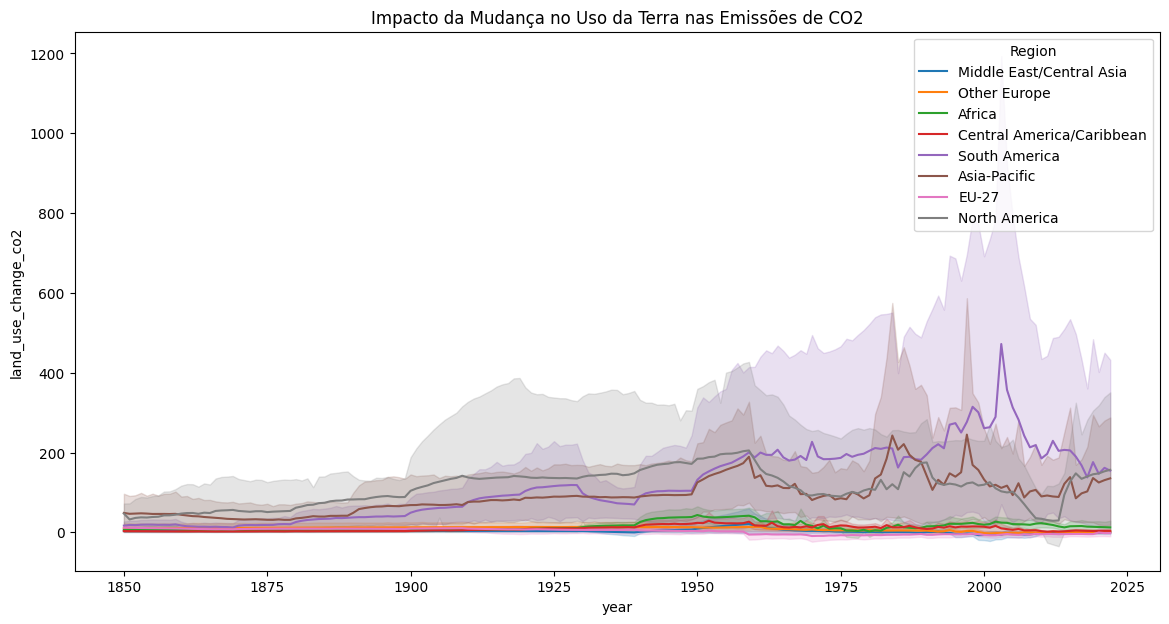

LinearRegression()

In [ ]:
# Criando DataFrame df_land_use
df_land_use = co2_df[['year', 'country', 'land_use_change_co2']]

# Adicionar a coluna 'Region' no DataFrame global_df
df_land_use = pd.merge(df_land_use, global_df[['country', 'Region']], on='country', how='left')

# Interpolação linear para preencher valores ausentes
df_land_use['land_use_change_co2'] = df_land_use['land_use_change_co2'].interpolate(method='linear')

# Encontrar o ano mais recente no DataFrame
ano_mais_recente = df_land_use['year'].max()

# Filtrar dados entre 1850 e o ano mais recente
df_land_use_filtered = df_land_use[df_land_use['year'].between(1850, ano_mais_recente)]

# Gráfico de impacto da mudança no uso da terra nas emissões de CO2
plt.figure(figsize=(14,7))
sns.lineplot(x='year', y='land_use_change_co2', hue='Region', data=df_land_use_filtered)
plt.title('Impacto da Mudança no Uso da Terra nas Emissões de CO2')
plt.show()

# Análise de regressão
X = df_land_use_filtered['year'].values.reshape(-1, 1)
y = df_land_use_filtered['land_use_change_co2']
model = LinearRegression()
model.fit(X, y)


### **Conclusão**

## Impacto da Mudança no Uso da Terra nas Emissões de CO2 (1850-2025)

O gráfico de linhas intitulado "Impacto da Mudança no Uso da Terra nas Emissões de CO2" mostra as variações nas emissões de CO2 devido a mudanças no uso da terra de 1850 a 2025. A seguir estão as observações principais para cada região:

### Regiões e Tendências:

- **Oriente Médio/Ásia Central (azul claro)**: Emissões relativamente estáveis com leves picos e flutuações ao longo do tempo.
- **Outros países da Europa (roxo)**: Variações moderadas nas emissões com alguns picos notáveis.
- **África (verde)**: Emissões crescentes ao longo do tempo, com flutuações acentuadas.
- **América Central/Caribe (vermelho)**: Emissões estáveis, com um leve aumento em períodos específicos.
- **América do Sul (roxo escuro)**: Tendência de crescimento nas emissões, com picos significativos.
- **Ásia-Pacífico (marrom)**: Emissões variáveis, com crescimento acentuado em certos períodos.
- **UE-27 (laranja)**: Emissões com picos elevados e variações ao longo do tempo.
- **América do Norte (preto)**: Emissões flutuantes com vários picos e quedas.



---



O gráfico ilustra as diferenças regionais e temporais nas emissões de CO2 devido a mudanças no uso da terra, mostrando como essas mudanças impactaram as emissões de maneira diversa ao longo dos anos. Essa análise é essencial para entender a contribuição histórica e regional das mudanças no uso da terra nas emissões de CO2, informando políticas e estratégias para mitigação de impactos ambientais.

---

Esta análise fornece uma visão detalhada das emissões de CO2 associadas a mudanças no uso da terra por região, ajudando a identificar tendências históricas e áreas de preocupação.



---



---





## Países que reduziram suas emissões absolutas de carbono e o uso de energias renováveis

##### O código analisa a relação entre as emissões de CO2 e o uso de energias renováveis ao longo do tempo. Ele filtra e limpa os dados para garantir que não haja valores ausentes, criando um gráfico de dispersão para visualizar como as emissões de CO2 se comportam em relação ao consumo de energia renovável. Além disso, calcula a correlação entre as duas variáveis, ajudando a entender se o aumento no uso de energias renováveis está associado à redução das emissões de CO2.

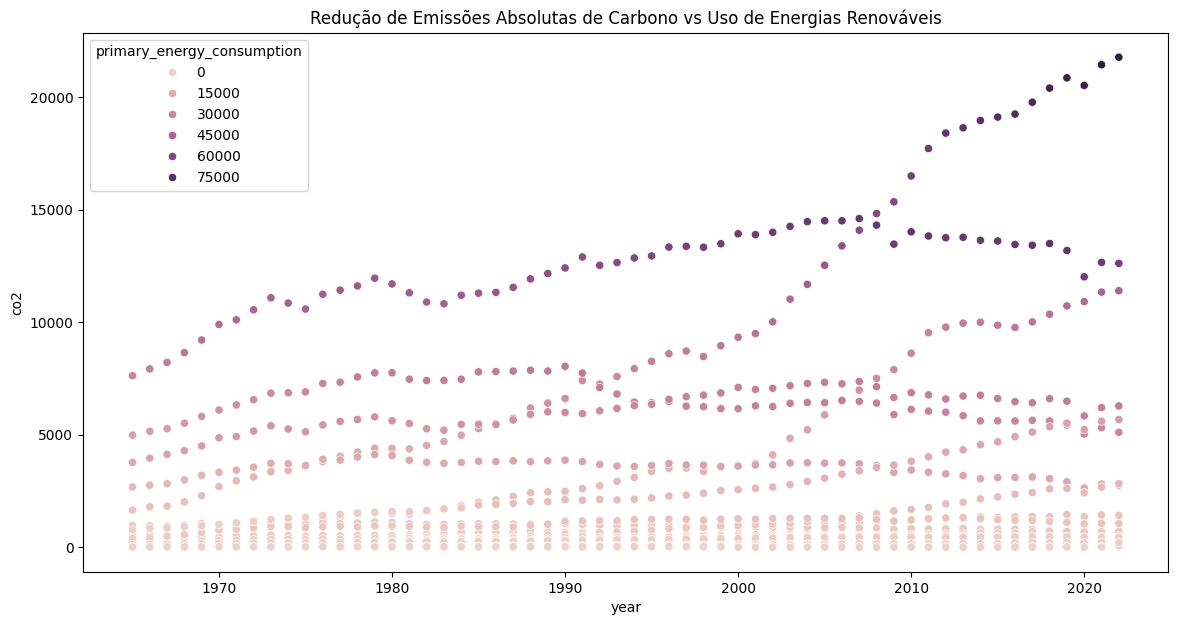

                                 co2  primary_energy_consumption
co2                         1.000000                    0.991693
primary_energy_consumption  0.991693                    1.000000


In [ ]:
# Filtrando apenas as colunas necessárias
df_renewable = co2_df[['year', 'co2', 'primary_energy_consumption']]

# Removendo linhas com valores ausentes
df_renewable = df_renewable.dropna(subset=['co2', 'primary_energy_consumption', 'year'])

# Gráfico de emissões absolutas e energias renováveis
plt.figure(figsize=(14,7))
sns.scatterplot(x='year', y='co2', hue='primary_energy_consumption', data=df_renewable)
plt.title('Redução de Emissões Absolutas de Carbono vs Uso de Energias Renováveis')
plt.show()


# Análise de correlação
correlation = df_renewable[['co2', 'primary_energy_consumption']].corr()
print(correlation)

### **Conclusão**

## Redução de Emissões Absolutas de Carbono vs Uso de Energias Renováveis (1960-2020)

O gráfico de dispersão intitulado "Redução de Emissões Absolutas de Carbono vs Uso de Energias Renováveis" ilustra a relação entre as emissões de CO2 e o consumo de energia primária ao longo do tempo, de 1960 a 2020. A seguir estão as observações principais:

### Principais Observações:

- **Eixo X**: Representa os anos de 1960 a 2020.
- **Eixo Y**: Representa as emissões de CO2.
- **Cores e Tamanhos dos Pontos**: Indicam o consumo de energia primária, variando de 0 a 75.000. Pontos mais escuros e maiores representam maior consumo de energia, enquanto pontos mais claros e menores indicam menor consumo.

### Tendências e Análise:

- **Tendência Geral**: Os dados mostram uma diminuição nas emissões de CO2 ao longo do tempo, especialmente em relação ao aumento no uso de energias renováveis.
- **Consumo de Energia Primária**: Os pontos maiores e mais escuros indicam que países com maior consumo de energia também tendem a ter maiores emissões de CO2, mas a adoção de energias renováveis contribui para a redução dessas emissões.
- **Períodos Críticos**: Picos em certos anos podem indicar eventos ou mudanças políticas que afetaram significativamente as emissões e o consumo de energia.



---



O gráfico destaca a importância do uso de energias renováveis na redução das emissões de CO2 ao longo das últimas décadas. A visualização ajuda a entender a relação entre consumo de energia e emissões de carbono, evidenciando como a transição para fontes de energia renováveis pode mitigar o impacto ambiental.

---

Esta análise fornece uma visão clara sobre a evolução das emissões de CO2 em relação ao uso de energias renováveis, informando políticas e estratégias para um futuro mais sustentável.



---



---




## Mudanças nas emissões de carbono per capita em países com políticas ambientais rigorosas

##### O código analisa as mudanças nas emissões de CO2 per capita em países com políticas ambientais rigorosas, como Alemanha, Dinamarca, Finlândia e França. Ele filtra os dados desses países, limpa as informações removendo valores ausentes e gera um gráfico para mostrar a evolução das emissões ao longo dos anos. Também exibe estatísticas descritivas sobre as emissões e realiza uma análise de regressão linear para verificar como as emissões de CO2 per capita se relacionam com o ano, permitindo avaliar o impacto das políticas ambientais na redução das emissões.

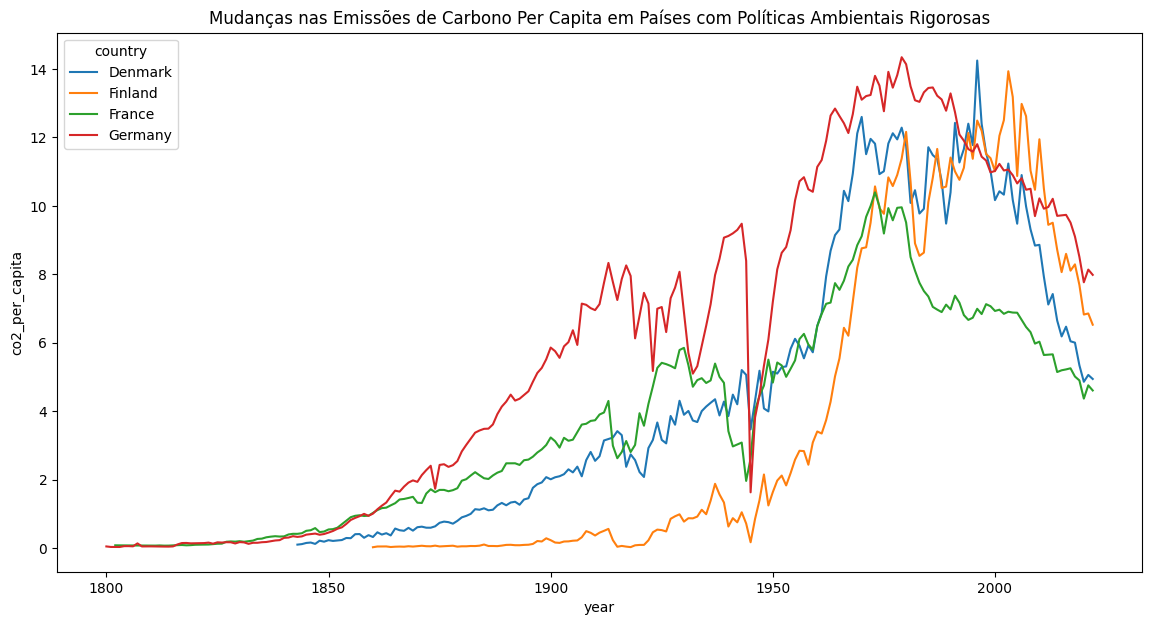

         count      mean       std    min     25%     50%       75%     max
country                                                                    
Denmark  180.0  4.920267  4.108219  0.097  1.2235  3.8655   8.93275  14.250
Finland  163.0  4.061890  4.705210  0.021  0.0930  1.0430   8.77450  13.937
France   215.0  3.746298  2.858505  0.067  1.1350  3.2200   5.89850  10.396
Germany  223.0  5.877722  4.706050  0.028  0.8480  5.8940  10.06300  14.347


LinearRegression()

In [ ]:
# Filtrar dados de países com políticas ambientais rigorosas
df_policy = co2_df[co2_df['country'].isin(['Germany', 'Denmark', 'France', 'Finland'])]

# Remover linhas com valores NaN na coluna 'co2_per_capita'
df_policy = df_policy.dropna(subset=['co2_per_capita'])

# Gráfico das mudanças nas emissões per capita
plt.figure(figsize=(14,7))
sns.lineplot(x='year', y='co2_per_capita', hue='country', data=df_policy)
plt.title('Mudanças nas Emissões de Carbono Per Capita em Países com Políticas Ambientais Rigorosas')
plt.show()

# Estatísticas descritivas
policy_stats = df_policy.groupby('country')['co2_per_capita'].describe()
print(policy_stats)

# Análise de regressão
X = df_policy[['year']]
y = df_policy['co2_per_capita']
model = LinearRegression()
model.fit(X, y)


### **Conclusão**

## Mudanças nas Emissões de Carbono Per Capita em Países com Políticas Ambientais Rigorosas (1800-2020)

O gráfico de linhas intitulado "Mudanças nas Emissões de Carbono Per Capita em Países com Políticas Ambientais Rigorosas" mostra as emissões de CO2 per capita ao longo do tempo para quatro países: Dinamarca, Finlândia, França e Alemanha. A seguir estão as observações principais:

### Principais Observações:

- **Eixo X**: Representa os anos de 1800 a 2020.
- **Eixo Y**: Representa as emissões de CO2 per capita.
- **Países**:
  - **Dinamarca (linha azul)**: Mostra um aumento nas emissões ao longo do tempo, com picos significativos.
  - **Finlândia (linha laranja)**: Apresenta um padrão de aumento nas emissões per capita similar ao da Dinamarca, com flutuações.
  - **França (linha verde)**: Mostra uma tendência de crescimento nas emissões até certo ponto, seguida de uma estabilização e posterior declínio.
  - **Alemanha (linha vermelha)**: Apresenta um aumento significativo nas emissões ao longo do tempo, com uma leve queda nas décadas mais recentes.

### Tendências e Análise:

- **Crescimento Inicial**: Todos os países mostram um aumento nas emissões de CO2 per capita desde o início da Revolução Industrial.
- **Picos de Emissões**: Há picos distintos em certos períodos, refletindo eventos históricos e econômicos, como a industrialização e a reconstrução pós-guerra.
- **Declínio Recentemente**: Notamos uma tendência de redução nas emissões nos últimos anos, especialmente na França e na Alemanha, provavelmente devido à implementação de políticas ambientais mais rigorosas e o aumento no uso de energias renováveis.

---

O gráfico ilustra a evolução das emissões de CO2 per capita em países com políticas ambientais rigorosas, destacando a influência dessas políticas na redução das emissões ao longo do tempo. Essa análise é essencial para entender o impacto das iniciativas ambientais na mitigação das mudanças climáticas.

---

Esta análise oferece uma visão clara sobre a evolução das emissões de CO2 per capita em diferentes países, ajudando a identificar tendências históricas e a eficácia das políticas ambientais.



---



---





## Relação entre Pegada de Carbono e Índice de Desenvolvimento Humano (HDI)

##### Este código analisa a relação entre a Pegada de Carbono (Carbon Footprint) e o Índice de Desenvolvimento Humano (HDI) em diferentes grupos de renda. As siglas dos grupos de renda (como 'LI' para Baixa Renda, 'UM' para Média Superior, etc.) são substituídas pelos seus significados completos em português. O gráfico gerado utiliza cores diferentes para representar cada grupo de renda (Baixa Renda, Média Inferior, Média Superior e Alta Renda), com o tamanho dos pontos indicando a população de cada país. Além disso, a legenda é personalizada manualmente, e o gráfico mostra como os países com diferentes níveis de renda se posicionam em relação à pegada de carbono e ao HDI.

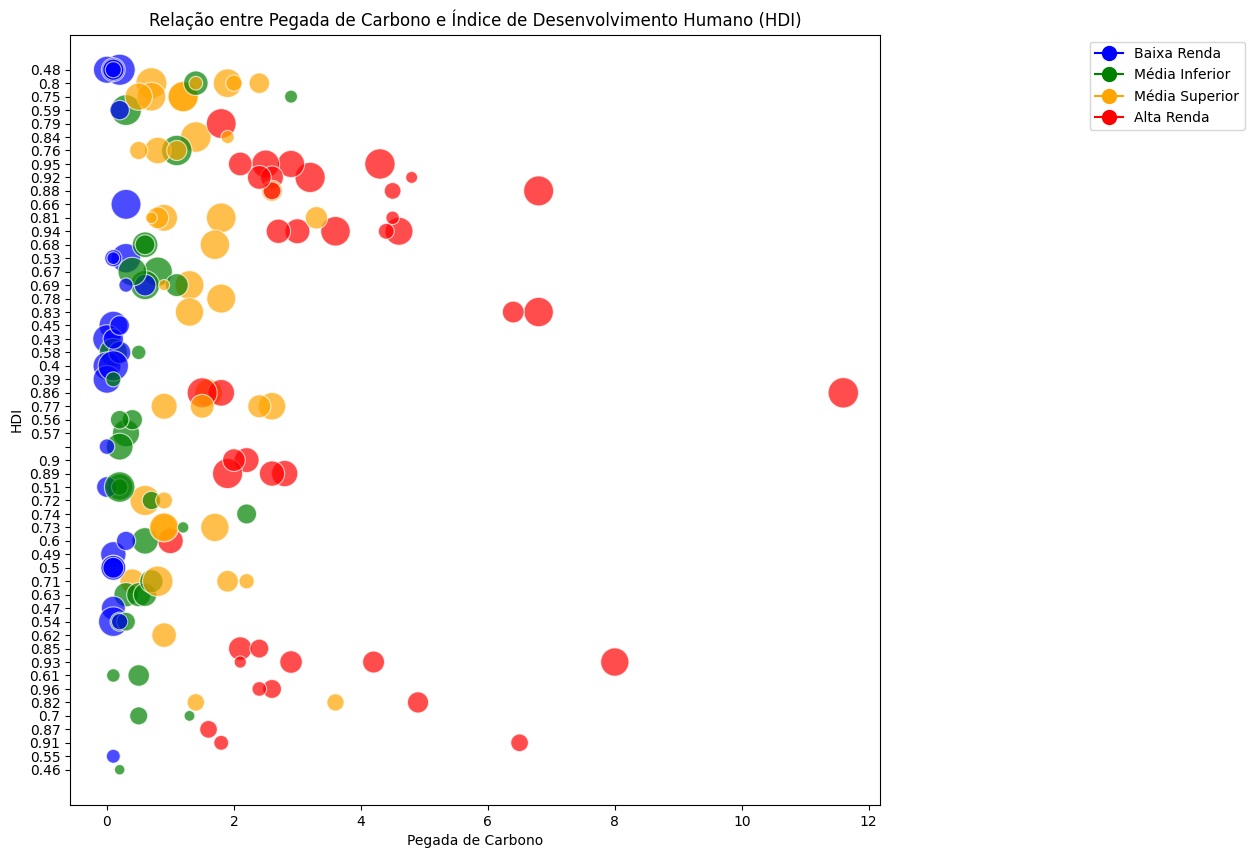

In [ ]:
# Mapeando as siglas para seus significados completos em português
group_mapping = {
    'LI': 'Baixa Renda',
    'UM': 'Média Superior',
    'LM': 'Média Inferior',
    'HI': 'Alta Renda'
}

# Substituindo as siglas no dataframe
global_df['Income Group'] = global_df['Income Group'].map(group_mapping)

# Definindo manualmente as cores para cada grupo
color_palette = {
    'Baixa Renda': 'blue',
    'Média Superior': 'orange',
    'Média Inferior': 'green',
    'Alta Renda': 'red'
}

# Criar o gráfico com Seaborn
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    data=global_df,
    x='Carbon Footprint',
    y='HDI',
    hue='Income Group',
    size='Population (millions)',
    sizes=(50, 500),
    alpha=0.7,
    palette=color_palette,  # Usando a paleta personalizada de cores
    legend=False  # Desativa a legenda automática
)

# Criando uma legenda personalizada com as cores
handles = [
    mlines.Line2D([], [], marker='o', color='blue', label='Baixa Renda', markersize=10),
    mlines.Line2D([], [], marker='o', color='green', label='Média Inferior', markersize=10),
    mlines.Line2D([], [], marker='o', color='orange', label='Média Superior', markersize=10),
    mlines.Line2D([], [], marker='o', color='red', label='Alta Renda', markersize=10)
]

# Adicionar a legenda manualmente
plt.legend(handles=handles, bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.5)

# Títulos e rótulos
plt.title('Relação entre Pegada de Carbono e Índice de Desenvolvimento Humano (HDI)')
plt.xlabel('Pegada de Carbono')
plt.ylabel('HDI')

# Ajustes para o gráfico não se sobrepor ao conteúdo
plt.subplots_adjust(right=0.8)

# Exibindo o gráfico
plt.show()

### **Conclusão**

## Pegada de Carbono vs Índice de Desenvolvimento Humano (IDH)

O gráfico de dispersão intitulado "Pegada de Carbono vs Índice de Desenvolvimento Humano (IDH)" ilustra a relação entre a pegada de carbono e o IDH, categorizando os países por níveis de renda. A seguir estão as observações principais:

### Principais Observações:

- **Eixo X**: Representa a Pegada de Carbono.
- **Eixo Y**: Representa o Índice de Desenvolvimento Humano (IDH).
- **Cores e Tamanhos dos Pontos**: Indicam diferentes níveis de renda:
  - **Azul**: Baixa Renda
  - **Verde**: Média Inferior
  - **Amarelo**: Média Superior
  - **Vermelho**: Alta Renda

### Tendências e Análise:

- **Alta Renda (vermelho)**: Países com maior renda tendem a ter uma pegada de carbono mais elevada, refletindo maior consumo de recursos e emissões.
- **Média Superior (amarelo)**: Países com renda média superior mostram uma pegada de carbono menor que os de alta renda, mas ainda significativa.
- **Média Inferior (verde)**: Países com renda média inferior têm uma pegada de carbono ainda menor, com variação no IDH.
- **Baixa Renda (azul)**: Países de baixa renda têm a menor pegada de carbono, indicando um consumo menor e emissões reduzidas.



---



O gráfico destaca a correlação entre o nível de renda e a pegada de carbono, mostrando que países com maior renda geralmente têm um impacto ambiental mais significativo. No entanto, o IDH varia entre diferentes níveis de renda, indicando que o desenvolvimento humano não depende apenas do consumo de recursos.

---

Esta análise fornece uma visão detalhada sobre a relação entre a pegada de carbono e o desenvolvimento humano, ajudando a entender como diferentes níveis de renda impactam o meio ambiente.



---



---




## Algoritmo de classificação

### Análise de Distribuição dos Países com Base na Pegada de Carbono e Pegada Ecológica Total

##### O código carrega dados sobre a pegada ecológica e de carbono de países, seleciona variáveis relevantes, e aplica o algoritmo de clustering K-Means para agrupar os países em 3 clusters com base nessas variáveis. O K-Means tenta minimizar a distância entre os pontos dentro de um cluster, criando grupos de países com características semelhantes. Após a normalização dos dados, é gerado um gráfico de dispersão que mostra a distribuição dos clusters, e a eficiência do algoritmo é avaliada usando o Silhouette Score, que mede a qualidade da separação entre os clusters.

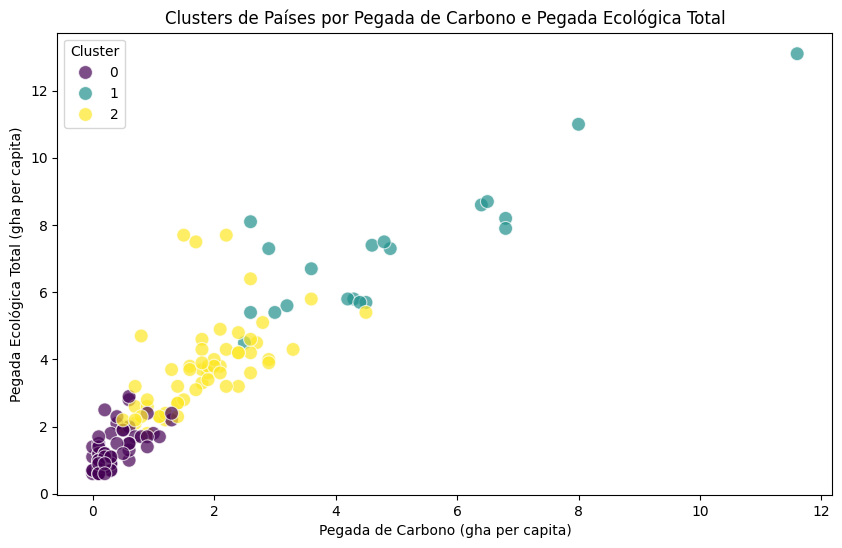

In [13]:
# Selecionar colunas relevantes para o clustering
colunas_cluster = ['Carbon Footprint', 'Total Ecological Footprint (Consumption)', 'HDI', 'Per Capita GDP']
df_cluster = global_df[['Country'] + colunas_cluster].copy()

# Tratar espaços em branco e valores não numéricos em todas as colunas selecionadas
df_cluster[colunas_cluster] = df_cluster[colunas_cluster].replace('[\$, ]', '', regex=True).replace('', pd.NA)

# Converter colunas para float, forçando o erro em dados não numéricos para NaN
df_cluster[colunas_cluster] = df_cluster[colunas_cluster].apply(pd.to_numeric, errors='coerce')

# Remover linhas com NaN após a conversão
df_cluster = df_cluster.dropna()

# Normalizar os dados para clustering
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[colunas_cluster])

# Aplicar o algoritmo k-means para 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Plotar o gráfico de dispersão com os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Carbon Footprint', y='Total Ecological Footprint (Consumption)',
                hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters de Países por Pegada de Carbono e Pegada Ecológica Total')
plt.xlabel('Pegada de Carbono (gha per capita)')
plt.ylabel('Pegada Ecológica Total (gha per capita)')
plt.legend(title='Cluster')
plt.show()

### **Conclusão**

Este gráfico mostra a distribuição dos países com base em duas variáveis: a **Pegada de Carbono** (gha per capita) e a **Pegada Ecológica Total** (gha per capita), com os pontos agrupados em 3 clusters (identificados pelas cores: roxo, verde e amarelo).

### **Análise Visual**

#### Cluster 0 (Roxo):
- Este cluster agrupa países com valores mais baixos de pegada de carbono e pegada ecológica total, localizados principalmente no eixo inferior-esquerdo do gráfico.
- Isso sugere que estes países têm um impacto ecológico menor, possivelmente devido a práticas mais sustentáveis ou economias de baixo carbono.

#### Cluster 1 (Verde):
- Este cluster apresenta países com pegadas moderadas de carbono e ecológicas totais, situados na região intermediária do gráfico.
- Esses países provavelmente têm um padrão de consumo e emissões mais equilibrado, com economias em crescimento que ainda não chegaram aos níveis mais elevados de pegada ecológica.

#### Cluster 2 (Amarelo):
- Este cluster é composto por países com os maiores valores de pegada de carbono e pegada ecológica total, situando-se no canto superior direito do gráfico.
- Países neste cluster provavelmente têm economias mais desenvolvidas e um maior impacto ambiental, possivelmente devido a maior industrialização, consumo elevado e altas emissões de carbono.




---


O gráfico mostra claramente como os países se agrupam em três categorias com base em suas pegadas ecológicas e de carbono. O **`Cluster 0`** representa países com menor impacto ambiental, enquanto o **`Cluster 2`** agrupa os países com maior impacto ecológico. O **`Cluster 1`** fica no meio, com valores intermediários dessas variáveis.

Esses clusters podem ser utilizados para entender padrões globais e ajudar a formular políticas direcionadas à redução de impacto ambiental ou transição para economias mais sustentáveis.



---



---




## Relação entre PIB per Capita e Pegada Ecológica

##### Este código analisa a relação entre o PIB per capita e a pegada ecológica total de diferentes países. Primeiro, ele limpa os dados que já foram separados da coluna do PIB per capita, removendo os caracteres de dólar e vírgulas, e a converte para um tipo numérico. Em seguida, filtra os dados relevantes e realiza uma regressão linear para prever a pegada ecológica com base no PIB per capita. O gráfico gerado exibe os dados reais como pontos azuis e a linha de regressão em vermelho. Além disso, o coeficiente de correlação de Pearson é calculado para medir a força da relação entre essas duas variáveis. O valor de correlação é impresso, indicando a força e a direção da associação entre o PIB per capita e a pegada ecológica.

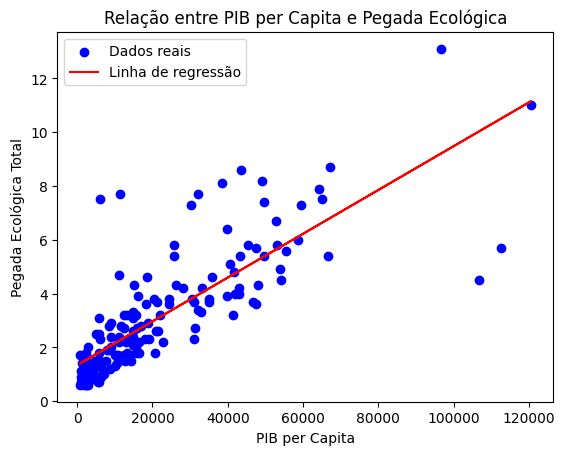

Correlação de Pearson: 0.80


In [ ]:
# Definir X e Y
X = df_filtered[['Per Capita GDP']]  # PIB per capita
y = df_filtered['Total Ecological Footprint (Consumption)']  # Pegada ecológica

# Regressão Linear
regressor = LinearRegression()
regressor.fit(X, y)

# Predições
y_pred = regressor.predict(X)

# Plotar gráfico de dispersão com a linha de regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Linha de regressão')
plt.xlabel('PIB per Capita')
plt.ylabel('Pegada Ecológica Total')
plt.title('Relação entre PIB per Capita e Pegada Ecológica')
plt.legend()
plt.show()

# Coeficiente de correlação de Pearson
corr, _ = pearsonr(df_filtered['Per Capita GDP'], df_filtered['Total Ecological Footprint (Consumption)'])
print(f'Correlação de Pearson: {corr:.2f}')


### **Conclusão**

## Relação entre PIB per Capita e Pegada Ecológica Total

O gráfico de dispersão intitulado "Relação entre PIB per Capita e Pegada Ecológica Total" ilustra a relação entre o PIB per Capita e a Pegada Ecológica Total. A seguir estão as observações principais:

### Principais Observações:

- **Eixo X**: Representa o PIB per Capita, variando de 0 a 120.000.
- **Eixo Y**: Representa a Pegada Ecológica Total, variando de 0 a 12.
- **Pontos Azuis**: Representam os dados reais.
- **Linha Vermelha**: Representa a linha de regressão.

### Tendências e Análise:

- **Correlação Positiva**: O gráfico mostra uma correlação positiva entre o PIB per Capita e a Pegada Ecológica Total. Isso significa que, à medida que o PIB per Capita aumenta, a Pegada Ecológica Total também tende a aumentar.
- **Distribuição dos Pontos**: A maioria dos pontos se concentra na parte inferior esquerda do gráfico, indicando que muitos países têm um PIB per Capita baixo e uma Pegada Ecológica Total relativamente baixa. Contudo, há uma dispersão significativa à medida que os valores aumentam.
- **Linha de Regressão**: A linha de regressão (vermelha) mostra a tendência geral de crescimento da Pegada Ecológica com o aumento do PIB per Capita, destacando a relação direta entre riqueza econômica e impacto ambiental.



---



O gráfico destaca a relação entre o desenvolvimento econômico (medido pelo PIB per Capita) e o impacto ambiental (medido pela Pegada Ecológica Total). Países mais ricos tendem a ter uma maior Pegada Ecológica, sugerindo que o crescimento econômico está associado a um maior consumo de recursos naturais e, consequentemente, a um impacto ambiental maior.

---

Esta análise fornece uma visão clara sobre a relação entre o PIB per Capita e a Pegada Ecológica Total, ajudando a entender como a prosperidade econômica influencia o impacto ambiental.



---



---




## Correlação entre Pegada Ecológica, PIB per Capita, Expectativa de Vida e IDH

##### Este código realiza uma análise de correlação entre a pegada ecológica, PIB per capita, expectativa de vida e índice de desenvolvimento humano (IDH) de diversos países. Primeiro, o dataset é carregado e a coluna do PIB per capita é limpa, removendo símbolos de dólar e vírgulas, sendo então convertida para formato numérico. A seguir, são selecionadas as colunas de interesse e limpas para garantir que todos os dados possam ser analisados. O código remove qualquer valor ausente (NaN) e, finalmente, calcula a matriz de correlação entre as variáveis selecionadas. O resultado é visualizado em um gráfico de calor, onde as correlações entre as variáveis são representadas por cores, permitindo identificar rapidamente as relações entre elas.

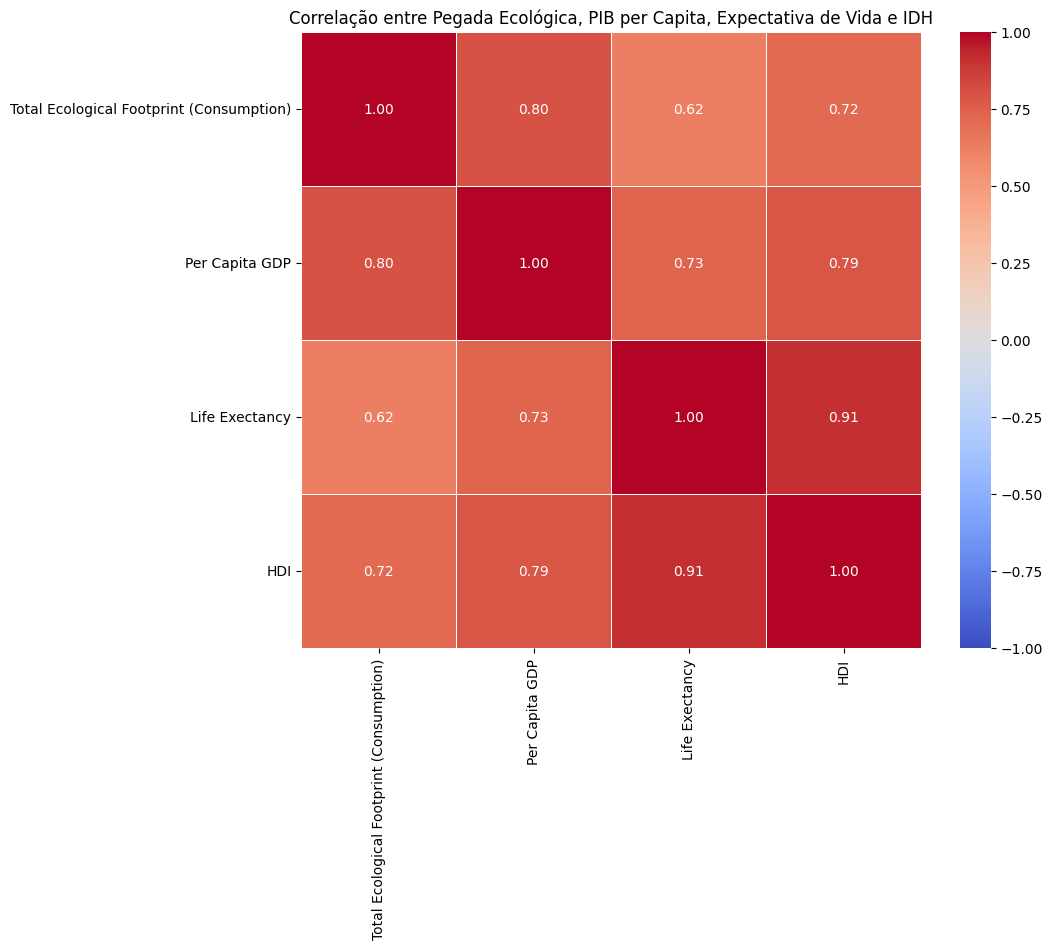

In [ ]:
# Limpar os dados da coluna 'Per Capita GDP' para remover os caracteres '$' e as vírgulas
global_df['Per Capita GDP'] = global_df['Per Capita GDP'].replace({'\$': '', ',': ''}, regex=True)

# Converter a coluna 'Per Capita GDP' para tipo numérico, forçando valores não numéricos a se tornarem NaN
global_df['Per Capita GDP'] = pd.to_numeric(global_df['Per Capita GDP'], errors='coerce')

# Filtrar as colunas de interesse para análise de correlação
df_filtered = global_df[['Total Ecological Footprint (Consumption)', 'Per Capita GDP', 'Life Exectancy', 'HDI']]

# Substituir espaços em branco e valores NaN por NaN para evitar problemas no cálculo da correlação
df_filtered = df_filtered.replace(r'^\s*$', float('nan'), regex=True)

# Converter todos os dados para numéricos, substituindo valores não numéricos por NaN
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes
df_filtered = df_filtered.dropna()

# Calcular a correlação entre as variáveis
corr_matrix = df_filtered.corr()

# Gerar o gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Pegada Ecológica, PIB per Capita, Expectativa de Vida e IDH')
plt.show()

### **Conclusão**

## Correlação entre Pegada Ecológica, PIB per Capita, Expectativa de Vida e IDH

O heatmap intitulado "Correlações entre Pegada Ecológica, PIB per Capita, Expectativa de Vida e IDH" mostra a correlação entre quatro variáveis: Pegada Ecológica Total (Consumo), PIB per Capita, Expectativa de Vida e IDH (Índice de Desenvolvimento Humano). A seguir estão as observações principais:

### Principais Observações:

- **Pegada Ecológica e PIB per Capita**: Correlação positiva forte de 0,80. Isso sugere que países com maior PIB per Capita tendem a ter uma pegada ecológica mais alta.
- **Pegada Ecológica e Expectativa de Vida**: Correlação positiva de 0,62, indicando que países com maior pegada ecológica também tendem a ter uma maior expectativa de vida.
- **Pegada Ecológica e IDH**: Correlação positiva de 0,72, mostrando que um maior IDH está associado a uma maior pegada ecológica.
- **PIB per Capita e Expectativa de Vida**: Correlação positiva de 0,73, sugerindo que um maior PIB per Capita está associado a uma maior expectativa de vida.
- **PIB per Capita e IDH**: Correlação positiva forte de 0,79, indicando que países mais ricos tendem a ter um IDH mais alto.
- **Expectativa de Vida e IDH**: Correlação positiva muito forte de 0,91, mostrando que uma maior expectativa de vida está fortemente associada a um IDH mais alto.



---



O heatmap ilustra as correlações entre importantes indicadores socioeconômicos e ambientais. As fortes correlações positivas entre Pegada Ecológica, PIB per Capita, Expectativa de Vida e IDH destacam a interdependência entre desenvolvimento econômico, qualidade de vida e impacto ambiental. Países mais ricos e desenvolvidos tendem a ter maior pegada ecológica, mas também desfrutam de maior expectativa de vida e IDH.

---

Esta análise fornece uma visão clara das relações entre pegada ecológica, PIB per Capita, expectativa de vida e IDH, ajudando a entender como esses fatores interagem e influenciam uns aos outros.



---



---




## **Conclusão Geral**

- Ao longo deste projeto de Data Science, realizamos uma análise aprofundada sobre as pegadas ecológicas e as emissões de CO₂, com foco em dados globais e do Brasil, visando entender os padrões de consumo e os impactos ambientais. Inicialmente, comparamos as pegadas de carbono e ecológicas de diferentes regiões e países, como o Brasil, Estados Unidos, a América, a OCDE e o mundo, destacando como essas variáveis estão relacionadas ao nível de desenvolvimento econômico e ao impacto ambiental. Além disso, exploramos as emissões de CO₂ no Brasil, segmentando por setores específicos, como o cimento, carvão, petróleo, gás e mudança no uso da terra, fornecendo uma visão detalhada de como cada setor contribui para as emissões ao longo do tempo.

- A análise das emissões provenientes da mudança no uso da terra destacou a importância desse fator no impacto ambiental, especialmente quando analisado por região. A interpolação linear foi utilizada para lidar com lacunas nos dados, e a regressão linear ajudou a modelar e entender as tendências dessas emissões ao longo dos anos. O estudo revelou que a mudança no uso da terra tem um impacto significativo nas emissões de CO₂, o que aponta para a necessidade de políticas públicas mais eficazes para mitigar esse problema.

- Em suma, as análises realizadas neste projeto fornecem uma visão clara dos desafios ambientais enfrentados por diferentes países e regiões. Ao entender as pegadas ecológicas e as emissões de CO₂, bem como os setores responsáveis por essas emissões, podemos criar estratégias mais informadas para reduzir o impacto ambiental global e fomentar uma transição para economias mais sustentáveis. Este estudo reforça a importância de monitorar e mitigar as emissões de CO₂, especialmente em setores-chave e em regiões com alto impacto, com vistas a um futuro mais sustentável para o planeta.



---



---



## Referências

- Dados dos datasets foram obtidos das seguintes fontes:
  - Kaggle: [kaggle.com](https://www.kaggle.com)
  - Our World in Data: [Our World in Data - CO2 Emissions](https://ourworldindata.org/co2-emissions)
  - World Population Review: [Most Environmentally Friendly Countries](https://worldpopulationreview.com/country-rankings/most-environmentally-friendly-countries)

- Auxílio na correção de texto e de código foi fornecido pelas tecnologias de LLM (Large Language Model):
  - Microsoft Copilot
  - ChatGPT